# Proyecto 1

## House Prices - Advanced Regression Techniques

El dataset escogido ha sido importado desde Kaggle de la sección "Competiciones". La descripción del dataset indica que es una excelente forma de entrenarnos en conocimientos básicos de Machine Learning.

El propósito de crear un modelo a partir de este dataset es predecir el precio de casas basadas en casi 80 características como el área, el tipo de techo o hasta el sistema de calefacción. Cuando pensamos en comprar una casa, generalmente no comenzamos describiendo la altura del techo, del sótano o la proximidad a una vía del tren. Sin embargo, este dataset demuestra que hay muchos más factores que influyen en las negociaciones del precio que simplemente el número de dormitorios o unas rejas.

Con 79 variables que describen casi todos los aspectos de las viviendas residenciales en Ames, Iowa, este dataset te desafía a predecir el precio final de cada hogar.

En el ámbito de la predicción de precios de viviendas, es de vital importancia considerar una amplia variedad de factores. Por ejemplo, el tamaño del lote, el año de construcción y remodelación, la calidad de los materiales y acabados, y la configuración del lote pueden tener un impacto significativo en el precio de venta. Además, características más específicas como el tipo de acceso a la calle, la calidad del sistema de calefacción y la existencia de comodidades adicionales como piscinas o porches pueden influir considerablemente en el valor de una propiedad.

En resumen, este dataset no solo es una herramienta para predecir precios de viviendas, sino también un recurso valioso para el aprendizaje y la aplicación de técnicas avanzadas en ciencia de datos y Machine Learning. La oportunidad de trabajar con un conjunto de datos tan rico y variado permite a los aspirantes a científicos de datos desarrollar soluciones innovadoras y efectivas, mejorando continuamente sus habilidades y conocimientos en el campo.

### Importar las librerías

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importar el archivo .csv

In [ ]:
df = pd.read_csv("train.csv")
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Una vez revisado el head, veremos el shape para confirmar que sean 1460 filas y 81 columnas de acuerdo a lo indicado en el dataset.

In [ ]:
df.shape

(1460, 81)

Revisaremos también la información estadística básica de cada columna.

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Iniciamos con los gráficos. En primer lugar veremos si existe una relación directa entre el precio de venta y el año de construcción.

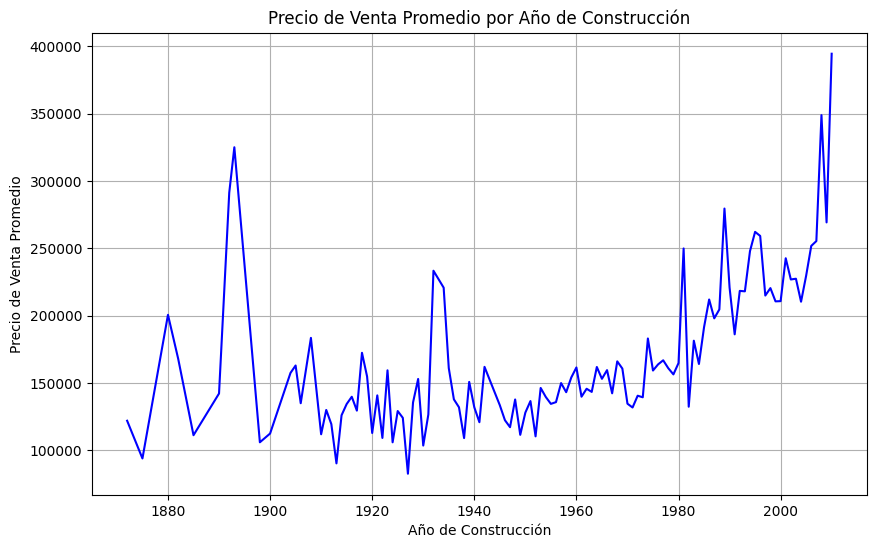

In [ ]:
df_agrupado = df.groupby('YearBuilt')['SalePrice'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(df_agrupado['YearBuilt'], df_agrupado['SalePrice'], linestyle='-', color='b')
plt.title("Precio de Venta Promedio por Año de Construcción")
plt.xlabel("Año de Construcción")
plt.ylabel("Precio de Venta Promedio")
plt.grid(True)
plt.show()

Podemos ver que existe una tendencia que indica una relación directa con el año de construcción pero también hay casas en las que independientemente de la fecha de construcción son muy caras similares a las de años recientes.

El siguiente gráfico permite comparar cómo varían los precios de venta entre los distintos barrios y detectar los precios que son más altos o más bajos.

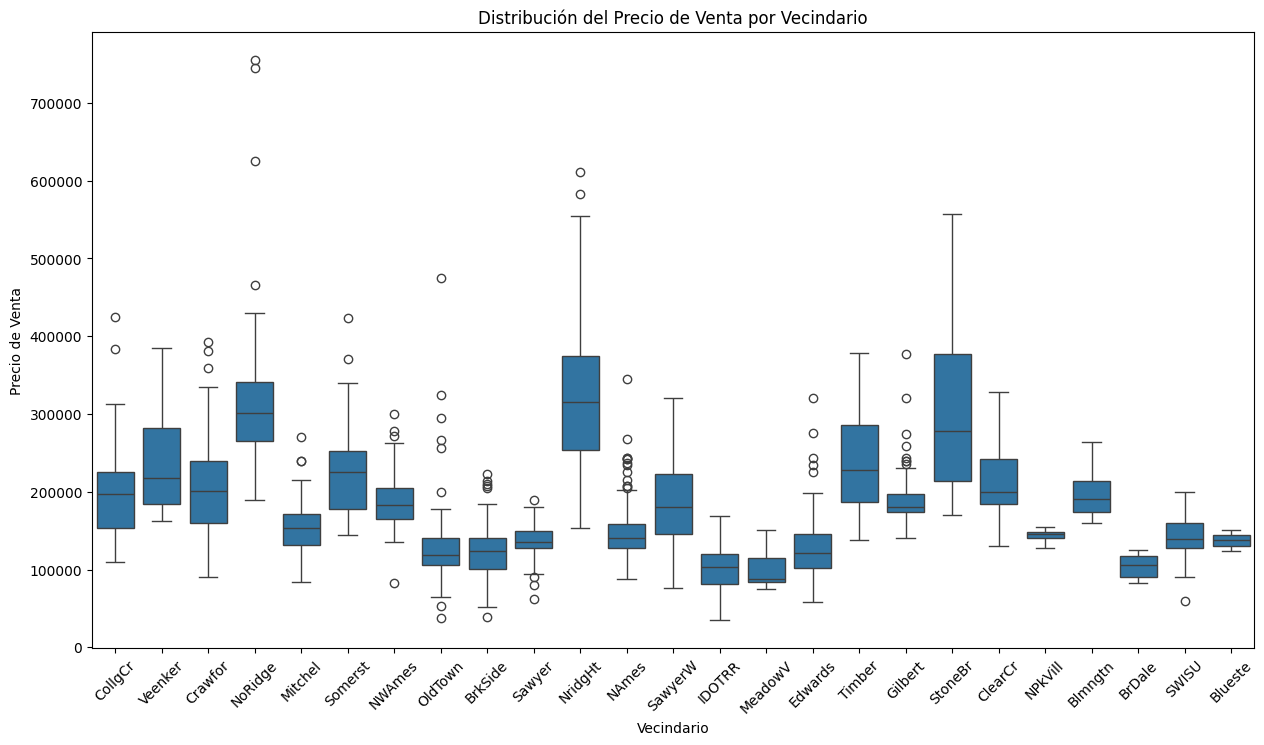

In [ ]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.title("Distribución del Precio de Venta por Vecindario")
plt.xlabel("Vecindario")
plt.ylabel("Precio de Venta")
plt.xticks(rotation=45)
plt.show()

En el gráfico podemos ver que existen varios outliers (puntos fuera de los bigotes) pero cerca a las cajas. Sin embargo, en NoRidge y NridgHt hay precios de venta en los cuales están muy alejados por distintos factores.

En el siguiente gráfico podemos ver cómo varía el precio de venta de los inmuebles por el tipo y calidad de los materiales.

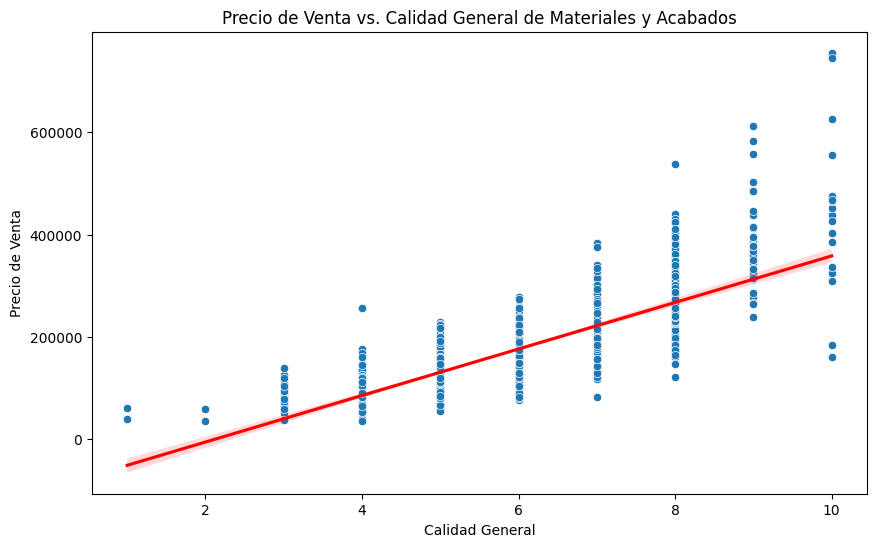

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=df)
sns.regplot(x='OverallQual', y='SalePrice', data=df, scatter=False, color='red')
plt.title("Precio de Venta vs. Calidad General de Materiales y Acabados")
plt.xlabel("Calidad General")
plt.ylabel("Precio de Venta")
plt.show()

Como era de esperarse, entre mejor es la calificación de la calidad de los materiales, el precio es más alto, donde exceden los 600,000 dólares.

En el gráfico siguiente podemos ver la relación entre el área y el precio de venta de los inmuebles.

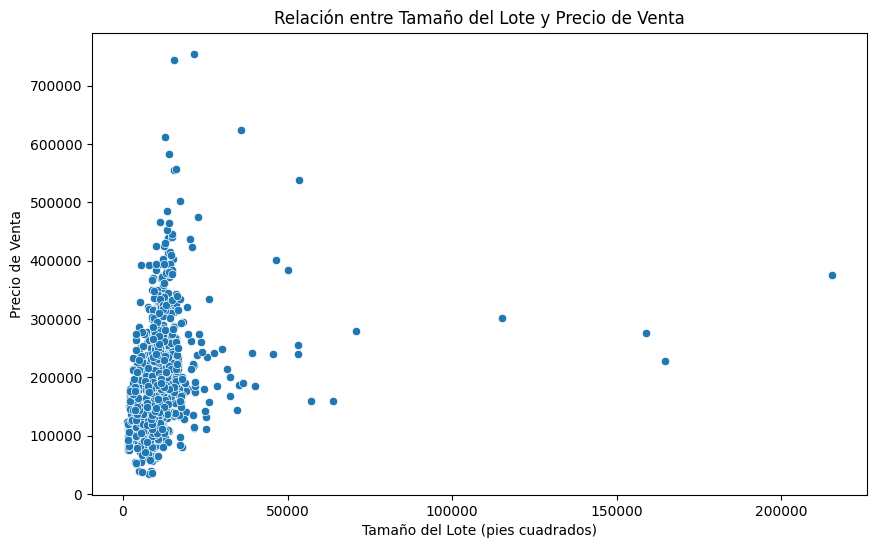

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice', data=df)
plt.title("Relación entre Tamaño del Lote y Precio de Venta")
plt.xlabel("Tamaño del Lote (pies cuadrados)")
plt.ylabel("Precio de Venta")
plt.show()

La relación entre el tamaño del lote y el precio no es directa, pues vemos como se eleva el precio por otras razones (como los materiales) y hay casos atípicos de casas de más de 150,000 pies cuadrads en los cuales los precios no son los más altos, probablemente sean fincas.

En este gráfico (que fue el más complicado) podemos ver la relación entre tres variables que son el Precio de Venta, área del lote y espacio en el garaje.

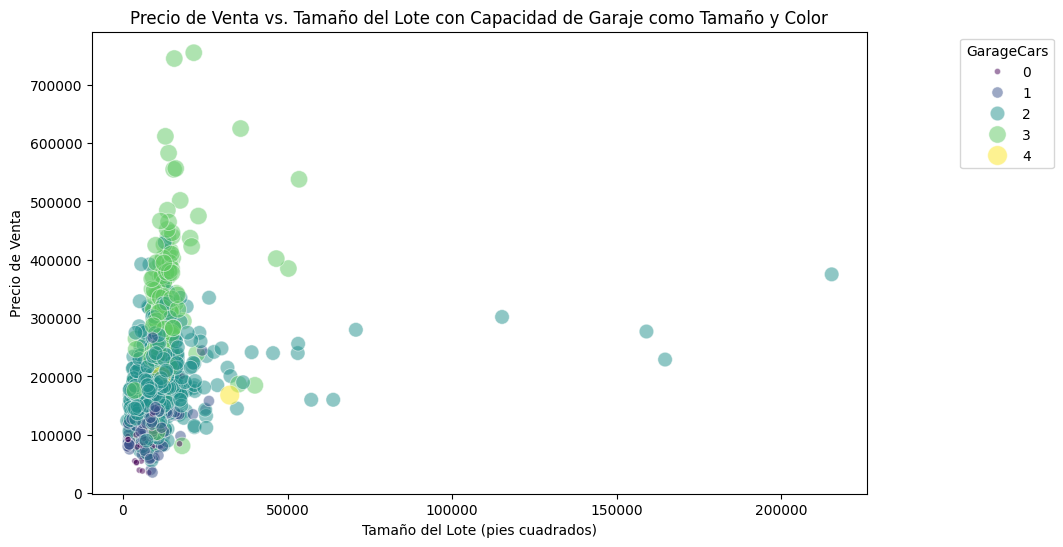

In [ ]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    x='LotArea',
    y='SalePrice',
    size='GarageCars',
    hue='GarageCars',
    data=df,
    sizes=(20, 200),
    alpha=0.5,
    palette='viridis'
)

plt.title("Precio de Venta vs. Tamaño del Lote con Capacidad de Garaje como Tamaño y Color")
plt.xlabel("Tamaño del Lote (pies cuadrados)")
plt.ylabel("Precio de Venta")
plt.legend(title='GarageCars', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

Se puede ver a simple vista que el en la mayoría de casos el espacio en el garaje es directamente relacional con el precio de venta pero no tanto con el tamaño del lote. Sin embargo, hay inmuebles con 4 garajes que están cerca al precio de $200,000 esto indica que lo máximo que desean los compradores de mayor poder adquisitivo es espacio para 3 vehículos o 3 garajes.

Este histograma muestra la distribución de los precios de venta de las propiedades. (Se le agregó una línea KDE para poder tener una mejor visualización del movimiento).

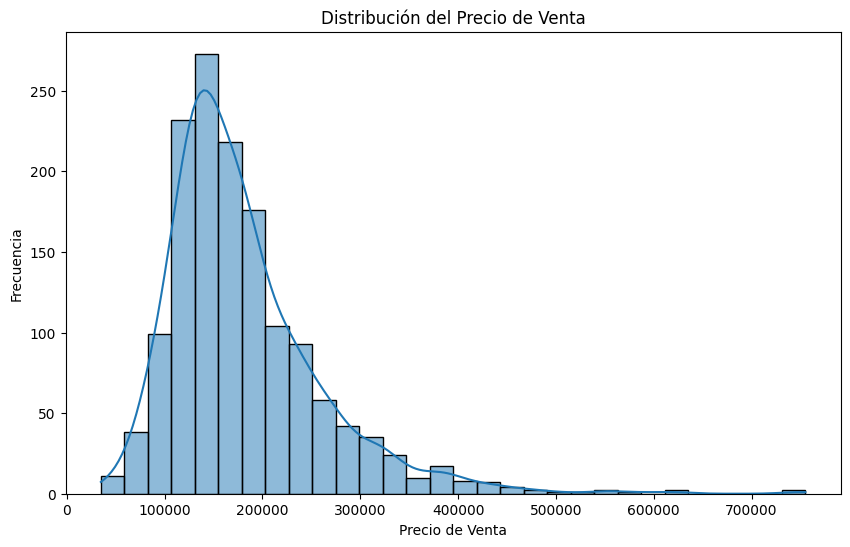

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title("Distribución del Precio de Venta")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

Quise agregar este histograma para ver la dispersión en los precios. Se puede apreciar claramente que la mayoría de casas están entre 100,000 y 200,000 dólares y llegan hasta más de 500,000 dólares pero son muy pocos.

En mi país no es muy usado el aire acondicionado dentro de los hogares, es por eso que he creado este gráfico (que contiene 20 gráficos dentro) en el cual evaúa el precio de venta con el área habitable (distinto del área del inmueble), divididos entre la calidad general y si cuenta con Aire Acondicionado o no (CentralAir = Y/N).

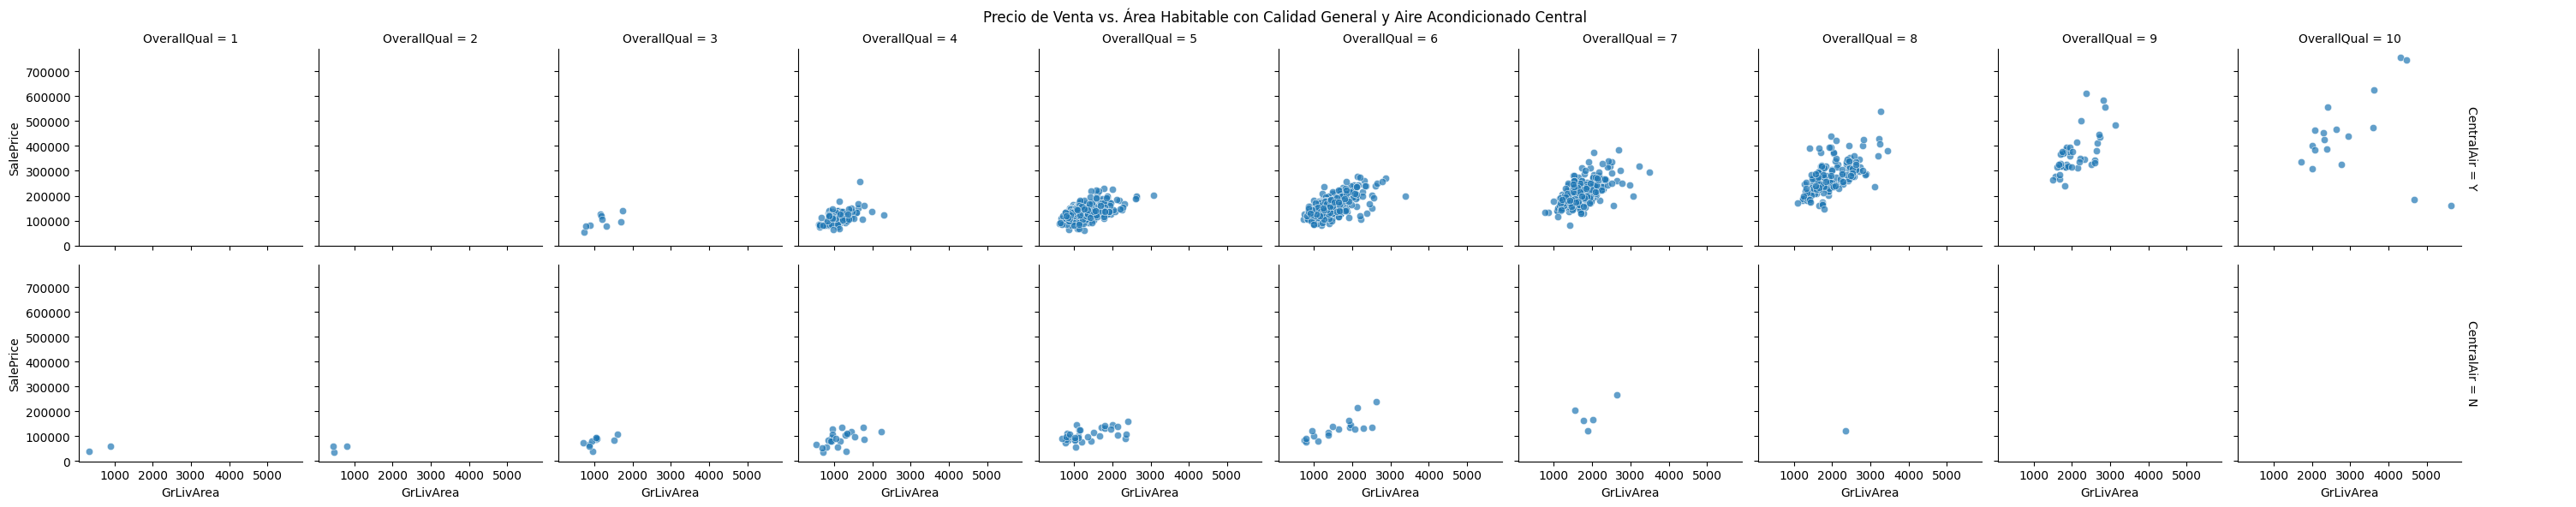

In [ ]:
grafico = sns.FacetGrid(df, col="OverallQual", row="CentralAir", margin_titles=True)
grafico.map(sns.scatterplot, "GrLivArea", "SalePrice", alpha=0.7)
grafico.add_legend()
plt.subplots_adjust(top=0.9)
grafico.fig.suptitle('Precio de Venta vs. Área Habitable con Calidad General y Aire Acondicionado Central')
plt.show()

De primera podemos ver que las calificaciones de calidad 1 y 2 no cuentan con aire acondicionado, y las calidades 9 y 10 (hasta 8) cuentan sí o sí con aire acondicionado. Es una relación directa contar con aire acondicionado al precio pues entre la calidad 4 y 7 los precios ascienden mucho más que en los que no tienen. Y como dato extra, por la cantidad de puntos, podemos apreciar que es más común tener aire que no tener.

## Inicio del modelo de ML

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN


#### Separamos las características (X) y la variable objetivo (y)


In [ ]:
X = train_data.drop(['SalePrice', 'Id'], axis=1)
y = train_data['SalePrice']
X_test = test_data.drop(['Id'], axis=1)

 #### Identificamos columnas numéricas y categóricas

In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

#### Creamos transformadores para el preprocesamiento

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

#### Combinamos los transformadores usando el ColumnTransformer

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

#### Creamos y entrenamos el modelo

In [ ]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'L...
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object'))])),
                ('regressor', RandomForestRegressor(random_state=0))])

#### Hacer predicciones en el conjunto de validación

In [ ]:
y_pred = model.predict(X_valid)

## Evaluación del modelo

In [ ]:
mae = mean_absolute_error(y_valid, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 17579.181061643834


## Hacemos las predicciones en los datos de prueba y lo exportamos en .csv

In [ ]:
test_preds = model.predict(X_test)

In [ ]:
output = pd.DataFrame({'Id': test_data.Id, 'SalePrice': test_preds})
output.to_csv('predict.csv', index=False)

### Lo juntaré todo en un archivo llamado "test_with_predictions.csv"

In [ ]:
test_data = pd.read_csv('test.csv')
predict_data = pd.read_csv('predict.csv')

final_data = test_data.merge(predict_data, on='Id')

final_data.to_csv('test_with_predictions.csv', index=False)

In [ ]:
final_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_x,SalePrice_y
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,NaN,126731.50
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,NaN,151701.50
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,NaN,183910.52
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,NaN,184586.82
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,NaN,196752.00


### Haremos algunos de los gráficos con los resultados de la predicción

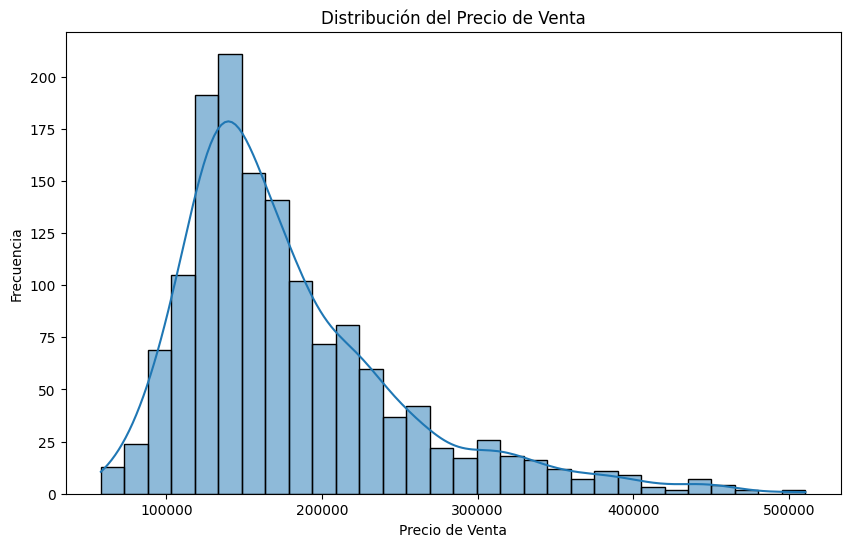

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(final_data['SalePrice_y'], kde=True, bins=30)
plt.title("Distribución del Precio de Venta")
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.show()

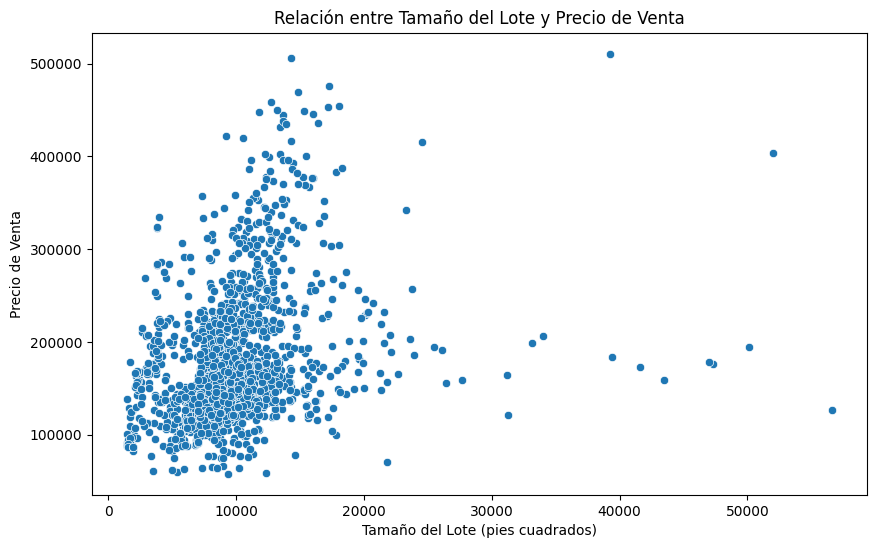

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LotArea', y='SalePrice_y', data=final_data)
plt.title("Relación entre Tamaño del Lote y Precio de Venta")
plt.xlabel("Tamaño del Lote (pies cuadrados)")
plt.ylabel("Precio de Venta")
plt.show()

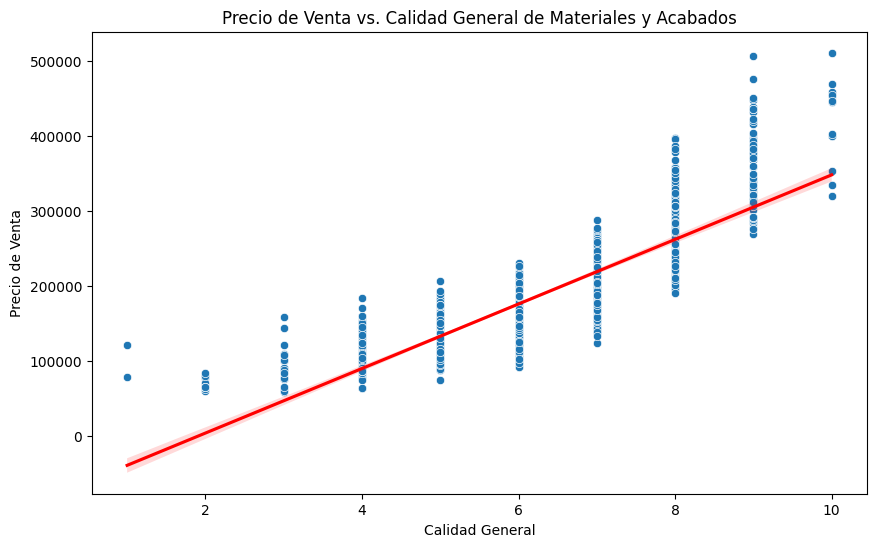

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallQual', y='SalePrice_y', data=final_data)
sns.regplot(x='OverallQual', y='SalePrice_y', data=final_data, scatter=False, color='red')
plt.title("Precio de Venta vs. Calidad General de Materiales y Acabados")
plt.xlabel("Calidad General")
plt.ylabel("Precio de Venta")
plt.show()

## Gráfico de Dispersión de Predicciones vs Valores Reales

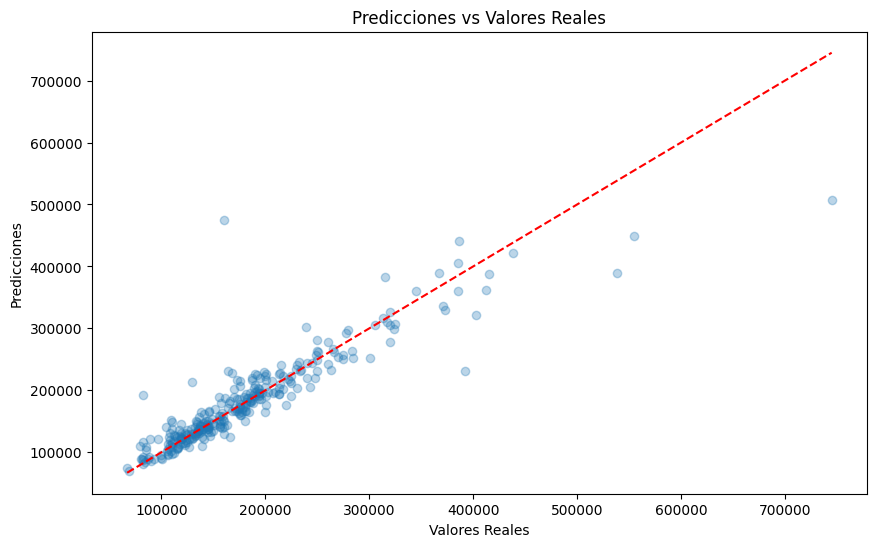

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_valid, y_pred, alpha=0.3)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], '--r')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs Valores Reales')
plt.show()

## Conclusiones

* El modelo ha demostrado que no solo las características obvias como el tamaño del lote o el número de habitaciones afectan el precio de una casa. Características más sutiles como la calidad del material exterior, el tipo de calefacción y la proximidad a carreteras principales también juegan un papel importante.

* El modelo de RandomForestRegressor ha mostrado un rendimiento razonable con un MAE de aproximadamente 17,404 dólares, lo que indica que, en promedio, nuestras predicciones difieren del precio real en esta cantidad. Aunque el modelo es útil para obtener una estimación general, hay espacio para mejorar en los cursos siguientes.

* El preprocesamiento de los datos, incluyendo la imputación de valores faltantes y la codificación de variables categóricas, fue crucial para el rendimiento del modelo.

* La interpretación de la importancia de las características ha proporcionado una visión valiosa sobre cuáles factores son más influyentes en la determinación del precio de las casas. Esta información puede ser útil no solo para mejorar el modelo, sino también para agentes inmobiliarios, tasadores y otros profesionales del sector que buscan entender mejor los factores que afectan los precios de las propiedades.